# 鳶尾花多元分類

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(7)

df = pd.read_csv("./iris_data.csv")
print(df.shape)

(150, 5)


In [39]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## 資料視覺化圖表

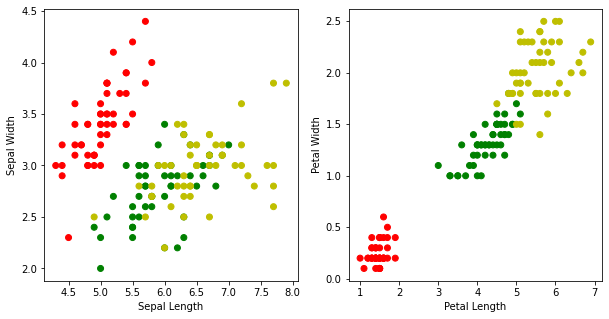

In [40]:
target_mapping={"setosa":0,"versicolor":1,"virginica":2}
Y = df["target"].map(target_mapping)
colmap = np.array(["r","g","y"])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.subplots_adjust(hspace= .5)
plt.scatter(df["sepal_length"],df["sepal_width"],color=colmap[Y])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.subplot(1,2,2)
plt.scatter(df["petal_length"],df["petal_width"],color=colmap[Y])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

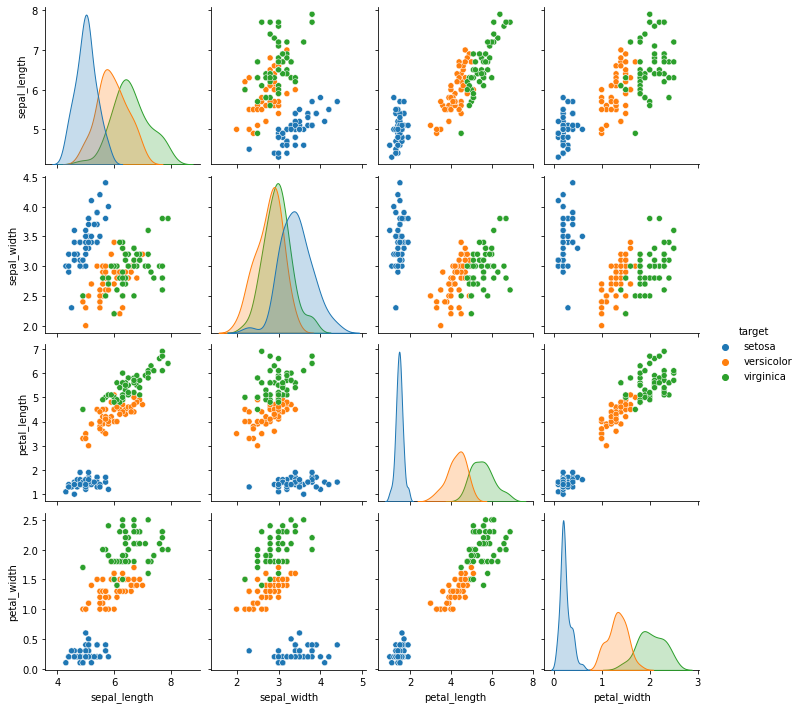

In [41]:
sns.pairplot(df, hue="target")

In [42]:
df["target"] = df["target"].map(target_mapping)

In [43]:
dataset = df.values
np.random.shuffle(dataset)
X = dataset[:, 0:4].astype(float)
Y = to_categorical(dataset[:, 4])

In [44]:
X -= X.mean(axis=0)
X /= X.std(axis=0)

In [45]:
X_train,Y_train = X[:120],Y[:120]
X_test,Y_test = X[120:],Y[120:]

In [46]:
model = Sequential()
model.add(Dense(6,input_shape=(4, ),activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 30        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [49]:
model.fit(X_train,Y_train,epochs=100,batch_size=5)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8640 - accuracy: 0.6000
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7788 - accuracy: 0.7667
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7093 - accuracy: 0.8250
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.8333
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5906 - accuracy: 0.8500
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5435 - accuracy: 0.8583
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.8667
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.8833
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.8750
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8917
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9750
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.9750
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9750
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9750
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0560 - accuracy: 0.9750
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9750
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.9750
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0552 - accuracy: 0.9750
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9917
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9750
Epoch 93/100


In [50]:
loss,accuracy = model.evaluate(X_test,Y_test)
print("準確度={:.2f}".format(accuracy))

1/1 [==============================] - 0s 158ms/step - loss: 0.1515 - accuracy: 0.9000
準確度=0.90


## 預測鳶尾花種類

In [62]:
Y_pred = np.argmax(model.predict(X_test), axis=-1)
print(Y_pred)
Y_target = dataset[:,4][120:].astype(int)
print(Y_target)

1/1 [==============================] - 0s 16ms/step
[0 1 1 2 2 1 1 0 1 1 0 0 0 1 1 0 2 2 2 2 0 2 1 2 0 2 1 2 1 0]
[0 1 1 2 2 1 2 0 1 1 0 0 0 1 1 0 2 2 1 2 0 2 1 1 0 2 1 2 1 0]


## 混淆矩陣分析

In [63]:
tb = pd.crosstab(Y_target,Y_pred, rownames=["label"], colnames=["predict"])
print(tb)

predict  0   1  2
label            
0        9   0  0
1        0  10  2
2        0   1  8


### 結論:三筆資料預測錯誤，其中一筆為標籤值是2，預測是1，剩下兩筆是標籤值是1，預測是2